#Section 3: Feed Forward NN

In [ ]:
import torch
import torch.nn as nn
import torchvision # for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [ ]:
input_size = 784 # 28X28 images
hidden_size = 100
num_classes = 10 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST dataset from pytorch
train_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = True, transform = transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = False, transform = transforms.ToTensor(),download=True)



Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
print(f'length of train_dataset is : {len(train_dataset)} and length of train_loader is : {len(train_loader)}')
print(f'length of test_dataset is : {len(test_dataset)} and length of test_loader is : {len(test_loader)}')

length of train_dataset is : 60000 and length of train_loader is : 600
length of test_dataset is : 10000 and length of test_loader is : 100


Let's take a look at one batch of this dataset.

In [ ]:
examples = iter(train_loader)
#unpack examples
samples , labels = examples.next()
print(f'samples shape : {samples.shape} ,labels shape : {labels.shape}')

samples shape : torch.Size([100, 1, 28, 28]) ,labels shape : torch.Size([100])


Let's plot 6 images of this batch.

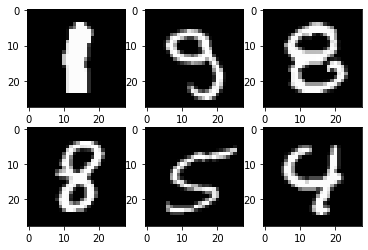

In [ ]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0],cmap='gray')

In [ ]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
# create model
model_mnist = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mnist.parameters(), lr= learning_rate)

total_input = len(train_loader)

###Train the model

In [ ]:
list = []

for epoch in range(num_epochs):
  for i, (image, label) in enumerate(train_loader):
    # shape of image is 100,1,28,28 , we want to reshape it to 100, 784
    image = image.reshape(-1, 784)

    # forward pass
    y_pred_mnist = model_mnist(image)
    loss = criterion(y_pred_mnist, label)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 100/600, loss : 0.4466 
epoch : 1/2 , step : 200/600, loss : 0.4063 
epoch : 1/2 , step : 300/600, loss : 0.3583 
epoch : 1/2 , step : 400/600, loss : 0.2705 
epoch : 1/2 , step : 500/600, loss : 0.3247 
epoch : 1/2 , step : 600/600, loss : 0.2468 
epoch : 2/2 , step : 100/600, loss : 0.2096 
epoch : 2/2 , step : 200/600, loss : 0.2642 
epoch : 2/2 , step : 300/600, loss : 0.2267 
epoch : 2/2 , step : 400/600, loss : 0.1761 
epoch : 2/2 , step : 500/600, loss : 0.2349 
epoch : 2/2 , step : 600/600, loss : 0.0953 


###Test the model

In [ ]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for image_test, label_test in test_loader:
    
    image_test = image_test.reshape(-1,784)
    output = model_mnist(image_test)

    _, y_pred_test = torch.max(output,1)
    n_true += (y_pred_test == label_test).sum()
    n_total += label.size(0)


print(f'accuracy of model on the 10000 images is : {(n_true/n_total) *100}')


accuracy of model on the 10000 images is : 95.4800033569336


In [ ]:
print(list)

[[1, 100, 0.4466078281402588], [1, 200, 0.40632733702659607], [1, 300, 0.3583229184150696], [1, 400, 0.27051863074302673], [1, 500, 0.3246749937534332], [1, 600, 0.24675136804580688], [2, 100, 0.20962238311767578], [2, 200, 0.2642391324043274], [2, 300, 0.2267332673072815], [2, 400, 0.17606474459171295], [2, 500, 0.23492076992988586], [2, 600, 0.09532473236322403]]


In [ ]:
len(list)

12

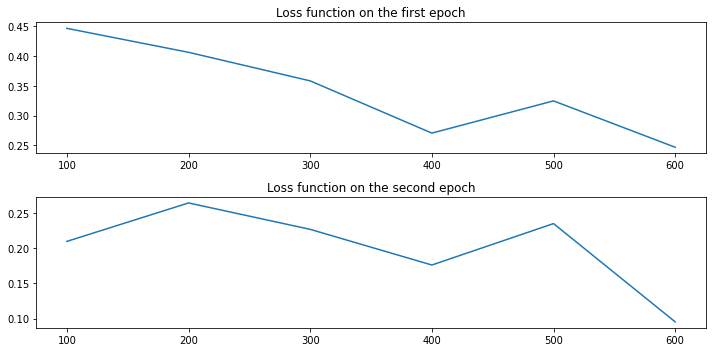

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2,1,figsize =(10, 5))
axs[0].set_title("Loss function on the first epoch")
sns.lineplot(x = [list[i][1] for i in range(6)] , y = [list[i][2] for i in range(6)], ax = axs[0])
axs[1].set_title("Loss function on the second epoch")
sns.lineplot(x = [list[i][1] for i in range(6,len(list))] , y = [list[i][2] for i in range(6,len(list))], ax = axs[1])
plt.tight_layout()

#Heart Disease classification with Feed Forward NN

Download the data and then save it in drive.

In [ ]:
import requests

url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data'
r = requests.get(url, allow_redirects=True)

open('SAheart.data', 'wb').write(r.content)

25106

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/AI-Internship/SAheart.data')

In [ ]:
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
data.shape

(462, 11)

In [ ]:
data = data.drop(columns='row.names')

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


We should use label encoder to converting labels into numeric form so that machine can read it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# present: 1 and absent: 0
le = LabelEncoder()
data['famhist'] = le.fit_transform(data['famhist'])

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


we should check for missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


Text(0.5, 1.0, 'Box Plot for each feature')

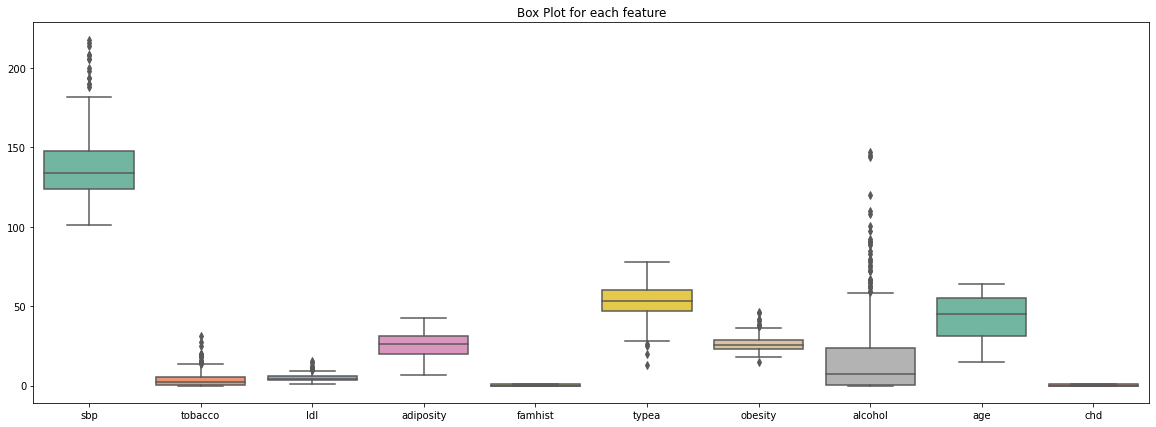

In [20]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

sbp,tobacco, ldl,typea, obesity and alcohol have outlier data. so we should treat outlier data.

In [21]:
Outlier_columns = ['sbp','tobacco','ldl','obesity','alcohol']
for i in Outlier_columns:
  median = data[i].quantile(0.50)
  threshold = data[i].quantile(0.80)
  data[i] = np.where(data[i] > threshold , median, data[i])

In [22]:
Outlier_columns = ['typea','obesity']
for i in Outlier_columns:
  median = data[i].quantile(0.50)
  threshold = data[i].quantile(0.20)
  data[i] = np.where(data[i] < threshold , median, data[i])

Text(0.5, 1.0, 'Box Plot for each feature')

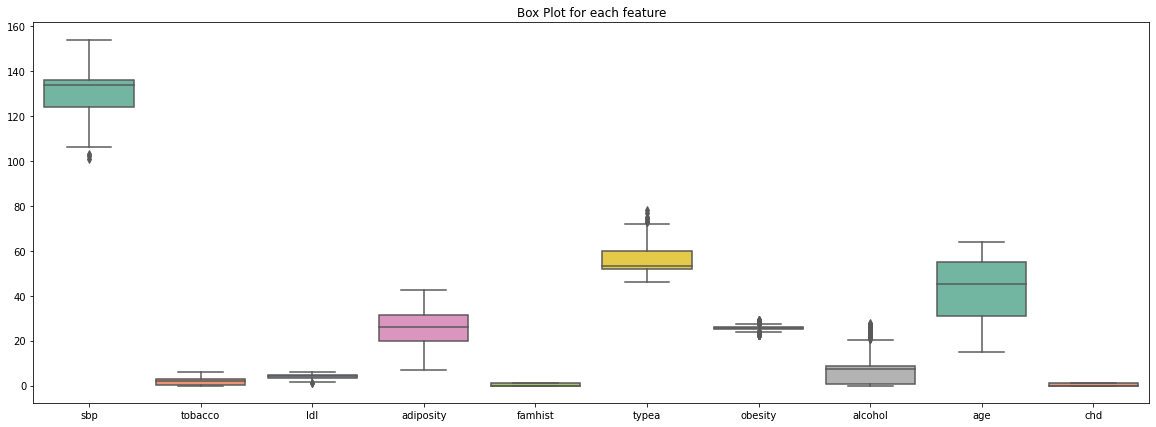

In [23]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

In [25]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,131.298701,1.829329,4.017056,25.406732,0.415584,55.870130,25.759778,7.042641,42.816017,0.346320
std,10.645009,1.732634,1.050609,7.780699,0.493357,6.491812,1.429216,7.192839,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,46.000000,22.400000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,52.000000,25.277500,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.803750,7.460000,45.000000,0.000000
75%,136.000000,2.677500,4.625000,31.227500,1.000000,60.000000,26.157500,8.487500,55.000000,1.000000
max,154.000000,6.100000,6.130000,42.490000,1.000000,78.000000,29.010000,27.670000,64.000000,1.000000


###Correlation matrix

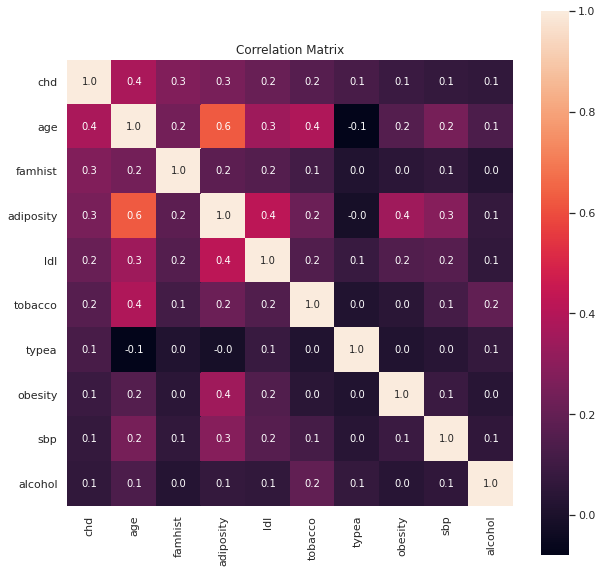

In [26]:
#chd correlation matrix
correlation_matrix = data.corr()
k = 10 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'chd')['chd'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [27]:
#Correlation with output variable
cor_target = abs(correlation_matrix['chd'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.2]
relevant_features

ldl          0.210284
adiposity    0.254121
famhist      0.272373
age          0.372973
chd          1.000000
Name: chd, dtype: float64

In [30]:
data.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [31]:
data.drop(labels=['sbp', 'tobacco','typea', 'obesity','alcohol'], axis=1, inplace=True) # remove irrelavent columns features
data.head()

,ldl,adiposity,famhist,age,chd
0,5.73,23.11,1,52,1
1,4.41,28.61,0,63,1
2,3.48,32.28,1,46,0
3,4.34,38.03,1,58,1
4,3.50,27.78,1,49,1


We should separate features and target.

In [32]:
features = data.drop(columns='chd')
target = pd.DataFrame(data['chd'])

In [33]:
print(f'feature shape : {features.shape}')
print(f'target shape : {target.shape}')

feature shape : (462, 4)
target shape : (462, 1)


Implement a custom Dataset class.

In [34]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

class SAheartdata(Dataset):

    def __init__(self, X, y):
 
        self.n_samples = X.shape[0]

        # Standardization
        sc = StandardScaler()
        X = sc.fit_transform(X)

        # convert DataFrame to numpy array
        y = y.to_numpy()

        # convert numpy to tensor
        self.x_data = torch.from_numpy(X.astype(np.float32)) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y.astype(np.float32)) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

###Split data into train and test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

In [52]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (369, 4)
X_test shape : (93, 4)
y_train shape : (369, 1)
y_test shape : (93, 1)


In [38]:
# create data
train_data = SAheartdata(X_train,y_train)
test_data = SAheartdata(X_test,y_test)

In [44]:
# get first sample of train data
x_sample, y_sample = train_data[0]
print(f'x_sample : {x_sample} and y_sample : {y_sample}')
print(f'x_sample shape : {x_sample.shape} and y_sample shape : {y_sample.shape}')

x_sample : tensor([ 0.7831, -0.2853, -0.8463, -0.0787]) and y_sample : tensor([0.])
x_sample shape : torch.Size([4]) and y_sample shape : torch.Size([1])


In [47]:
# create dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

In [51]:
print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

length of train data is : 369 and length of train loader is : 37
length of test data is : 93 and length of test loader is : 10


In [55]:
# get an example of train loader
example= iter(train_loader)

# unpack example
sample_x,sample_y = example.next()
 
print(f'samples shape : {sample_x.shape} ,labels shape : {sample_y.shape}')

samples shape : torch.Size([10, 4]) ,labels shape : torch.Size([10, 1])


In [59]:
# set parameters
input_size = 4
hidden_size = 5
num_classes = 1
num_epochs = 2
learning_rate = 0.01
batch_size = 10

In [63]:
# create neural network class
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    return out

In [64]:
# create model
model_hd = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_hd.parameters(), lr= learning_rate)

total_input = len(train_loader)

###Train the model

In [65]:
list_hd = []

for epoch in range(num_epochs):
  for i, (x, y) in enumerate(train_loader):

    # forward pass
    y_pred_hd = model_hd(x)
    loss = criterion(y_pred_hd, y)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 6 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list_hd.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 6/37, loss : 0.6416 
epoch : 1/2 , step : 12/37, loss : 0.6174 
epoch : 1/2 , step : 18/37, loss : 0.5874 
epoch : 1/2 , step : 24/37, loss : 0.6535 
epoch : 1/2 , step : 30/37, loss : 0.5149 
epoch : 1/2 , step : 36/37, loss : 0.8882 
epoch : 2/2 , step : 6/37, loss : 0.4603 
epoch : 2/2 , step : 12/37, loss : 0.5489 
epoch : 2/2 , step : 18/37, loss : 0.5176 
epoch : 2/2 , step : 24/37, loss : 0.6512 
epoch : 2/2 , step : 30/37, loss : 0.4596 
epoch : 2/2 , step : 36/37, loss : 0.4341 


###Test the model

In [73]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for x_test, y_test in test_loader:
    
    output = model_hd(x_test)
    y_pred = np.round(output) 

    n_true += (y_pred == y_test).sum()
    n_total += y_test.size(0)


print(f'accuracy of model on the 93 data is : {(n_true/n_total) *100}')


accuracy of model on the 93 data is : 67.74193572998047


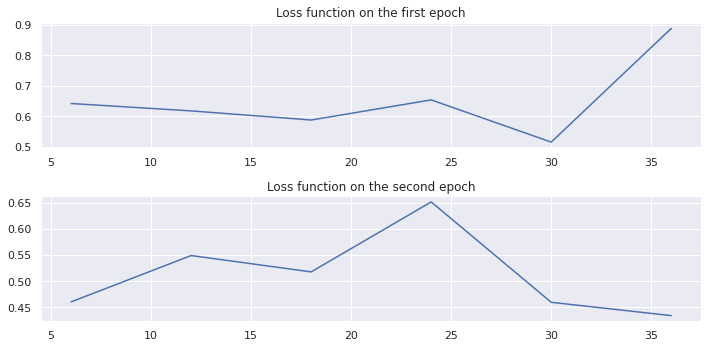

In [75]:
import seaborn as sns
fig, axs = plt.subplots(2,1,figsize =(10, 5))
axs[0].set_title("Loss function on the first epoch")
sns.lineplot(x = [list_hd[i][1] for i in range(6)] , y = [list_hd[i][2] for i in range(6)], ax = axs[0])
axs[1].set_title("Loss function on the second epoch")
sns.lineplot(x = [list_hd[i][1] for i in range(6,len(list_hd))] , y = [list_hd[i][2] for i in range(6,len(list_hd))], ax = axs[1])
plt.tight_layout()